In [1]:
import pandas as pd
import seaborn
import json
seaborn.set_theme()

import matplotlib.pyplot as plt
#plt.style.use('seaborn')
plt.style.use("ggplot")
import matplotlib
matplotlib.rcParams["figure.figsize"] = [11, 11.0]
matplotlib.rcParams["figure.dpi"] = 100
matplotlib.rcParams["savefig.dpi"] = 150

In [2]:
with open('output_generation_results.json', encoding='utf-8-sig') as f_input:
    df = pd.json_normalize(json.load(f_input))


df = df.sort_values(by='model')

# Unique Models
unique_models = sorted(df['model'].unique())

llm_column = 'model'

# only metrci column names
metric_columns = [col for col in df.columns if col != llm_column and col != 'question' and col != 'answer' and col != 'output']
numeric_metric_columns = [col for col in metric_columns if col != 'finish_reason']

numeric_metric_columns_with_model = [col for col in df.columns if col != 'finish_reason' and col != 'question' and col != 'answer' and col != 'output']

metric_df = df[numeric_metric_columns_with_model]
melted_metrics_df = pd.melt(metric_df, llm_column, var_name='metric')

df

,model,output,answer,keywords,perplexity,finish_reason,question,latency_ms,timings.load_time.time,timings.sample_time.time,...,timings.prompt_eval_time.tokens_per_second,timings.eval_time.time,timings.eval_time.runs,timings.eval_time.ms_per_token,timings.eval_time.tokens_per_second,timings.total_time.time,timings.total_time.tokens,token_usage.prompt_tokens,token_usage.completion_tokens,token_usage.total_tokens
105,Meta-Llama-3-8B-Instruct.Q8_0,(Source of information: University regulations),Wenn die Frist zur Annahme des Studienplatzes ...,"[keine Nachfrist, erlischt die Zulassung, Imma...",3.330685,stop,"Was passiert, wenn ich den Studienplatz nicht ...",13300,647.63,14.27,...,152.90,160.77,8,20.10,49.76,1655.76,1655,99,8,107
161,Meta-Llama-3-8B-Instruct.Q8_0,\nAnswer: Sie müssen mindestens eines der fol...,Neben dem Ergebnis des fachlich einschlägigen ...,"[fachlich einschlägigen Hochschulabschlusses, ...",1.184684,stop,Was muss ich noch einreichen außer meinen Note...,47808,710.12,291.50,...,300.05,4229.02,192,22.03,45.40,8447.94,8447,213,192,405
73,Meta-Llama-3-8B-Instruct.Q8_0,(German)\nAnswer: Wer entweder den Antrag auf...,"Vom Vergabeverfahren ausgeschlossen wird, wer ...","[nicht form- oder fristgemäß gestellt, Besonde...",1.124212,length,Wer wird vom Vergabeverfahren ausgeschlossen?,61313,681.60,362.53,...,233.35,5296.84,255,20.77,48.14,9410.80,9410,159,256,415
69,Meta-Llama-3-8B-Instruct.Q8_0,(Answer in German)\nSource: [www.master-studi...,Die Bewerberinnen und Bewerber nehmen am Auswa...,"[Durchschnittsnote, § 33 Abs. 2 S. 2 2. Halbsa...",1.475951,stop,Wie kann man sich für'n Master bewerben?,48061,678.38,286.39,...,218.24,3768.66,184,20.48,48.82,7192.94,7192,148,184,332
165,Meta-Llama-3-8B-Instruct.Q8_0,"\nAnswer: Die Zusatzkriterien sind wichtig, w...",Neben dem Ergebnis des fachlich einschlägigen ...,"[fachlich einschlägigen Hochschulabschlusses, ...",1.442598,stop,Warum sind Zusatzkriterien neben den Noten wic...,47290,711.51,282.69,...,310.72,4172.16,188,22.19,45.06,8366.93,8366,221,188,409
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
172,mistral-7b-instruct-v0.2.Q4_K_M,(Translation: Which criteria are evaluated in...,Im Auswahlgespräch wird die Eignung für den ge...,"[Eignung für den gewählten Studiengang, Motiva...",1.078759,stop,Welche Kriterien werden im Auswahlgespräch bew...,16810,648.41,76.42,...,390.37,2489.06,199,12.51,79.95,4071.42,4071,253,199,452
56,mistral-7b-instruct-v0.2.Q4_K_M,\n\nAnswer: Ihrer Frage kann folgende Antwort ...,Dem Antrag auf Zulassung müssen folgende Unter...,"[Nachweis über einen Hochschulabschluss, Zeugn...",1.078879,length,Welche Papiere muss ich mit dem Antrag mitgeben?,19440,672.15,103.22,...,412.31,3236.74,255,12.69,78.78,5042.77,5042,277,256,533
52,mistral-7b-instruct-v0.2.Q4_K_M,\n\nAnswer: Ihrer Anfrage nach dem folgenden M...,Dem Antrag auf Zulassung müssen folgende Unter...,"[Nachweis über einen Hochschulabschluss, Zeugn...",1.075177,length,Welche Papiere muss ich meinem Zulassungsantra...,19496,667.59,102.48,...,425.61,3254.53,255,12.76,78.35,5068.94,5068,284,256,540
84,mistral-7b-instruct-v0.2.Q4_K_M,(What happens after the completion of the sel...,Nach Abschluss des Auswahlverfahrens werden Zu...,"[Zulassungs- und Ablehnungsbescheide, postalis...",1.084614,stop,Was passiert nach Abschluss des Auswahlverfahr...,14402,612.05,51.05,...,187.95,1525.43,134,11.38,87.84,2637.14,2637,115,134,249


<Axes: xlabel='perplexity'>

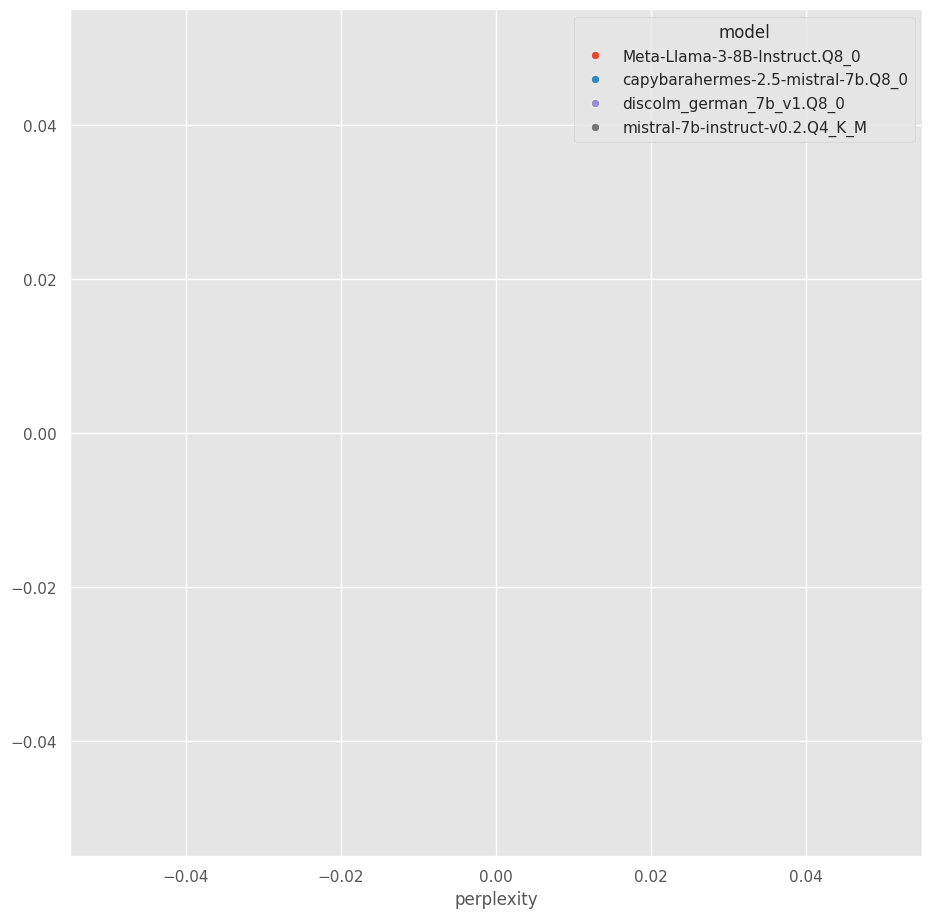

In [3]:
seaborn.scatterplot(
 data=df, 
 x="perplexity",
 hue=llm_column
)

<Axes: xlabel='model', ylabel='perplexity'>

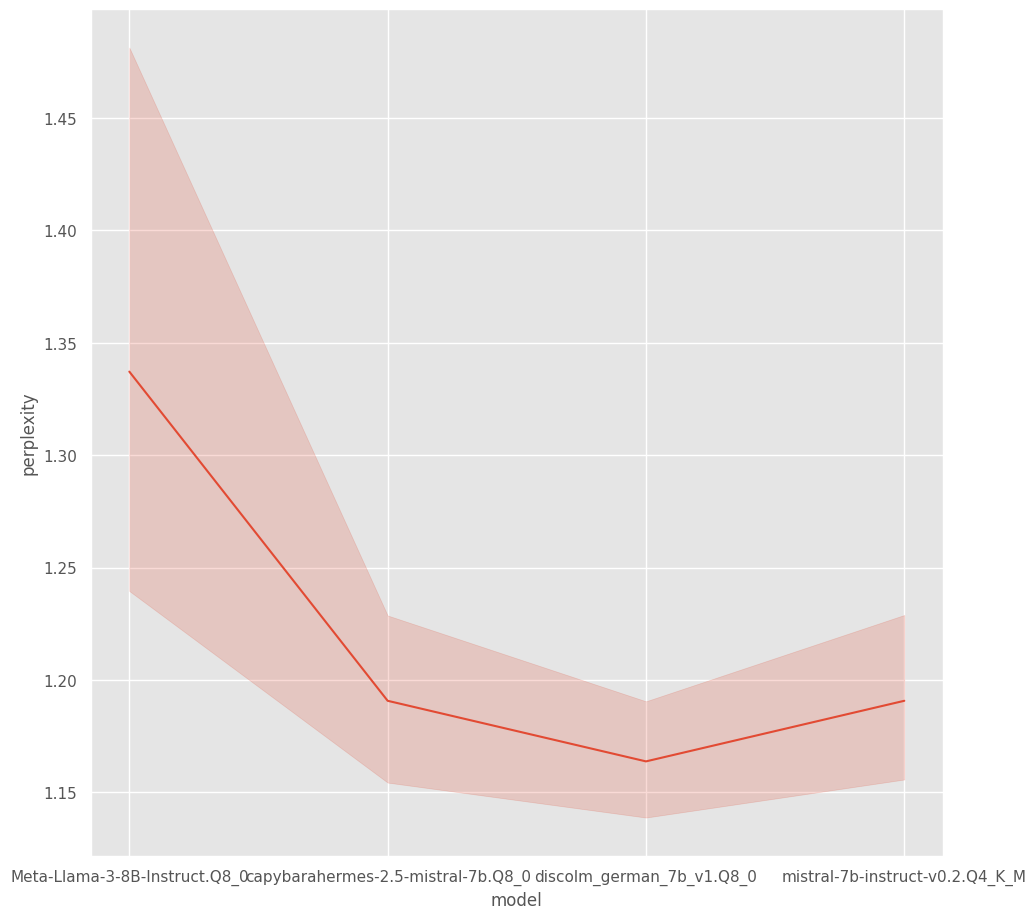

In [4]:
seaborn.lineplot(
 data=df, 
 x=llm_column,
 y="perplexity",
)

# **Histograms**

## One Histogram Plot for each Metric


TypeError: no numeric data to plot

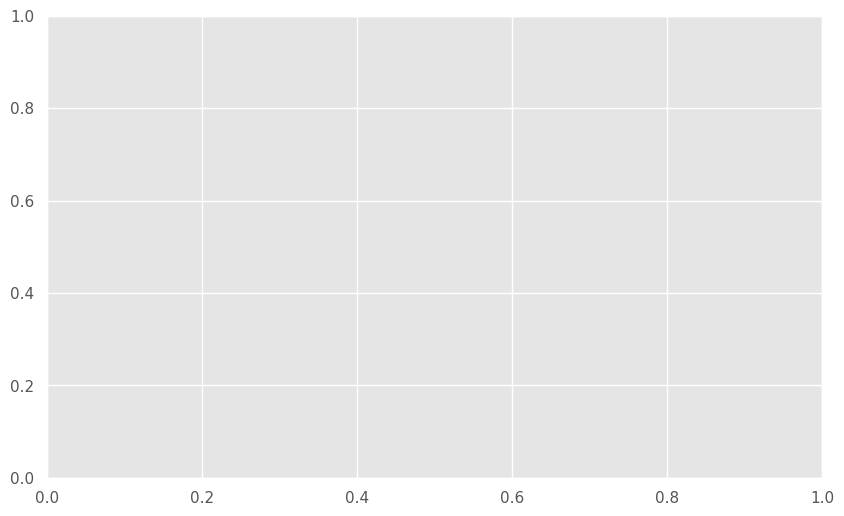

In [5]:


# Iterate over each metric column
for metric_col in numeric_metric_columns:
    # Create a figure and axis object for each metric column
    fig, ax = plt.subplots(figsize=(10, 6))
    
    # Get the range for the metric column
    min_val = df[metric_col].min()
    max_val = df[metric_col].max()
    
    # Iterate over unique 'llm' values and plot histogram for each value
    for llm_val in df[llm_column].unique():
        # Filter DataFrame for the specific 'llm' value
        subset_df = df[df[llm_column] == llm_val]
        
        # Plot histogram for the subset DataFrame
        subset_df[metric_col].plot(kind='hist', bins=20, alpha=0.5, label=f'LLM: {llm_val}', ax=ax)
    
    # Set labels and title
    plt.xlabel(metric_col)
    plt.ylabel('Count')
    plt.title(f'Histogram of {metric_col} with LLM')
    plt.legend()
    
    # Show the plot for the current metric column
    plt.show()

<Axes: xlabel='perplexity', ylabel='Count'>

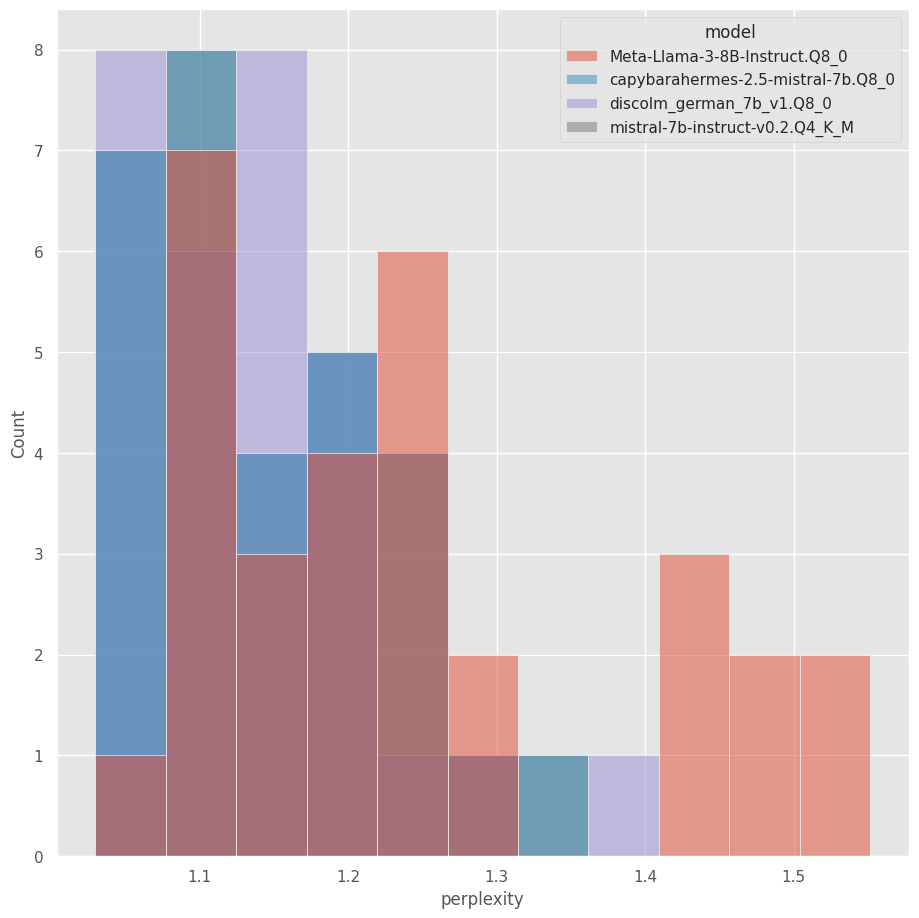

In [29]:
#seaborn.histplot(df, hue='llm')

seaborn.histplot(df, x='perplexity',  hue=llm_column)

## Small Histograms in ONE Plot

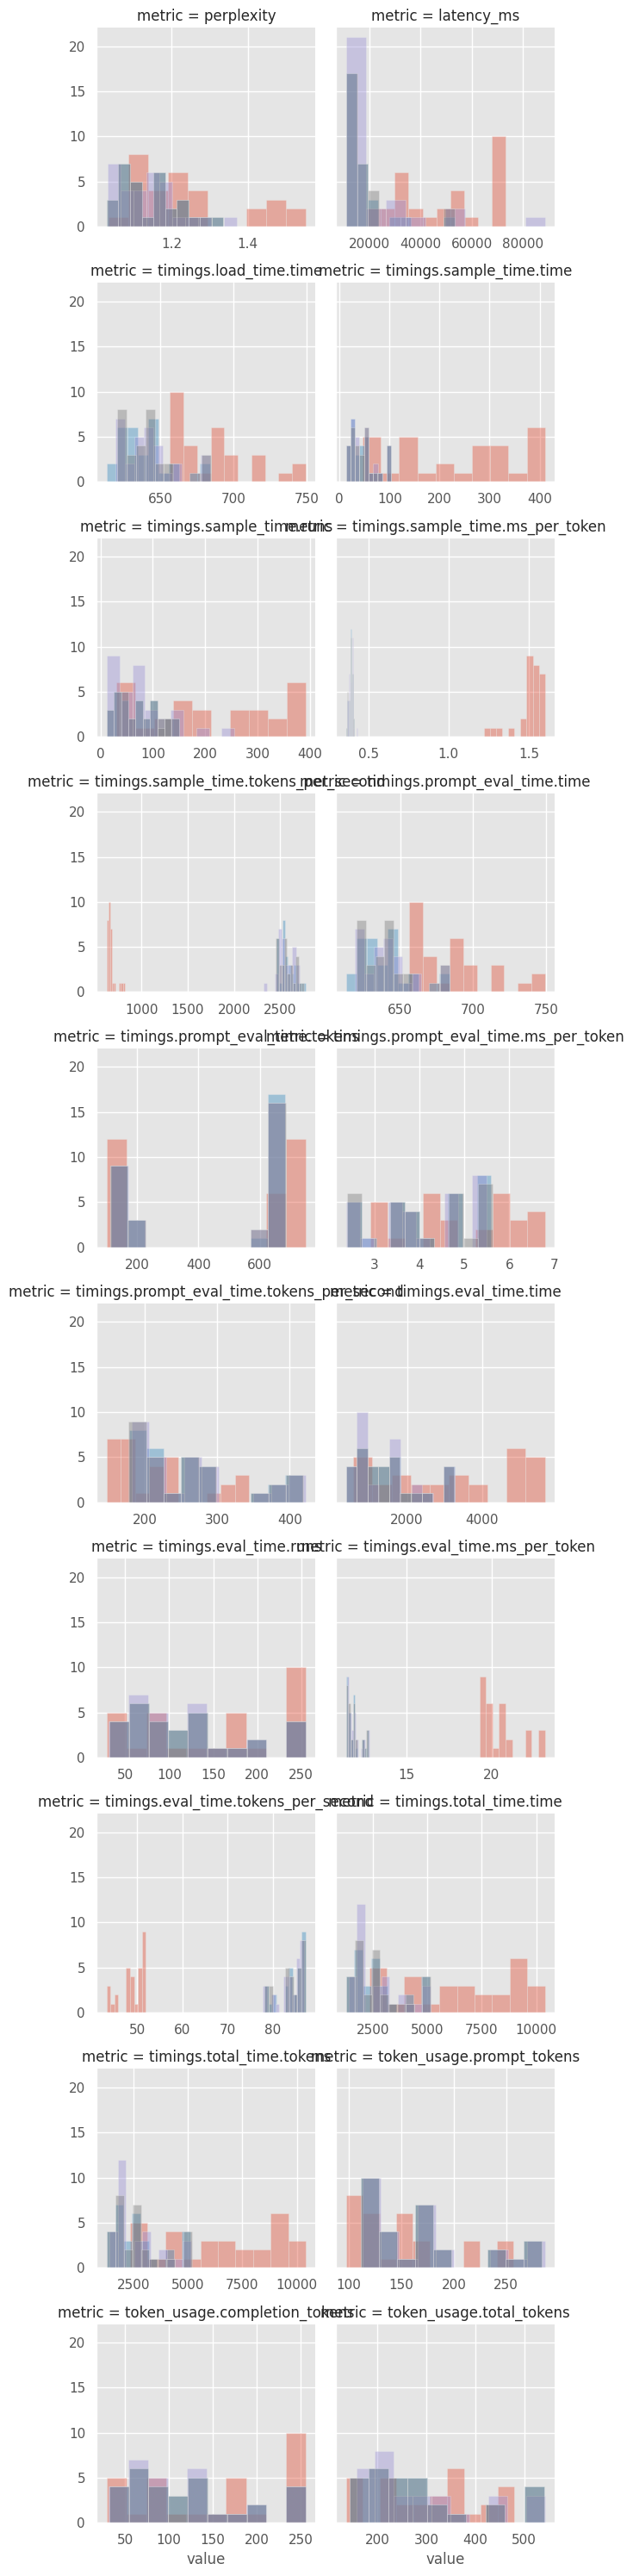

In [30]:
grid = seaborn.FacetGrid(melted_metrics_df, hue=llm_column, col="metric", col_wrap=2, sharex=False)
grid.map(plt.hist, "value", alpha=.4)

## Large Histograms in ONE Plot

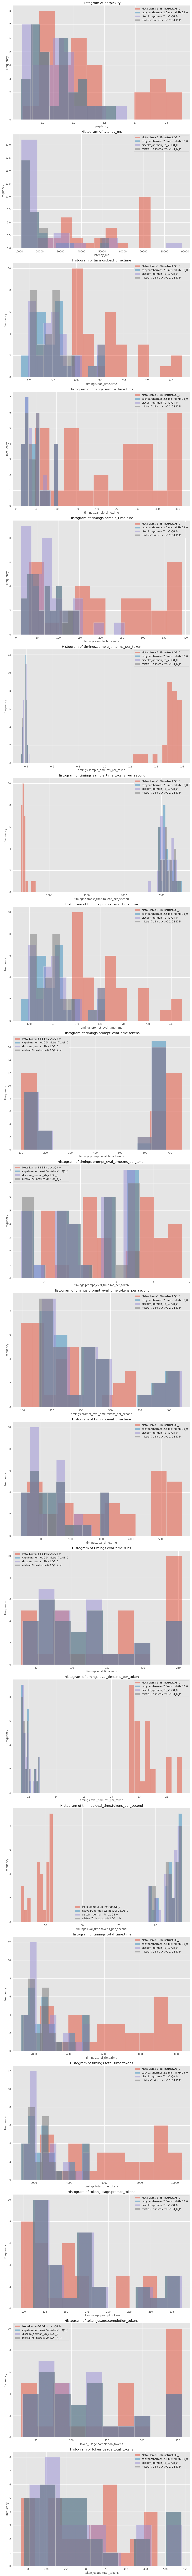

In [31]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the DataFrame from CSV

# Get unique values of 'llm' column
llm_values = df[llm_column].unique()


num_metrics = len(numeric_metric_columns)
fig, axes = plt.subplots(num_metrics, 1, figsize=(12, 8*num_metrics))

# Plot histograms for each metric
for i, metric in enumerate(numeric_metric_columns):
    ax = axes[i]
    for llm in llm_values:
        data = df[df[llm_column] == llm][metric]
        ax.hist(data, alpha=0.5, label=llm)
    ax.set_title(f'Histogram of {metric}')
    ax.set_xlabel(metric)
    ax.set_ylabel('Frequency')
    ax.legend()

plt.tight_layout()
plt.show()